# **Price Comparison Tool - NewtonAI Technologies Research Project**

In [2]:
"""
Price Comparison Tool - NewtonAI Technologies Research Project

Author: [Reshma]
Date: February 2026
Project: Laptop Price Comparison across E-commerce Sites

Description:
This script scrapes product information (name, price, rating) for laptop models
from Flipkart and Amazon India, then compares prices and generates visualizations.

Technology Stack:
- Selenium WebDriver (Firefox/GeckoDriver) for dynamic content handling
- Beautiful Soup 4 for HTML parsing
- Pandas for data processing
- Matplotlib for price comparison charts

Usage:
    python3 scrape.py

The script will:
1. Prompt for a laptop model name
2. Scrape top 10 results from Flipkart and Amazon
3. Export comparison data as CSV
4. Generate a bar chart showing price differences
"""

'\nPrice Comparison Tool - NewtonAI Technologies Research Project\n\nAuthor: [Your Name]\nDate: February 2026\nProject: Laptop Price Comparison across E-commerce Sites\n\nDescription:\nThis script scrapes product information (name, price, rating) for laptop models\nfrom Flipkart and Amazon India, then compares prices and generates visualizations.\n\nTechnology Stack:\n- Selenium WebDriver (Firefox/GeckoDriver) for dynamic content handling\n- Beautiful Soup 4 for HTML parsing\n- Pandas for data processing\n- Matplotlib for price comparison charts\n\nUsage:\n    python3 scrape.py\n\nThe script will:\n1. Prompt for a laptop model name\n2. Scrape top 10 results from Flipkart and Amazon\n3. Export comparison data as CSV\n4. Generate a bar chart showing price differences\n'

# **SCRAPING FLIPKART & AMAZON**

# **IMPORT LIBRARIES**

 LAPTOP PRICE COMPARISON TOOL
   Project: Price Comparison Tool - NewtonAI Technologies
   Platforms: Flipkart & Amazon India



Enter laptop model to search (e.g., 'HP Pavilion', 'Acer Nitro 5'):  Acer nitro 5



 Starting Firefox browser...
Firefox browser started successfully

 Searching Flipkart for: Acer nitro 5
 Found 24 product containers
 [1] Acer Nitro 5 AMD Ryzen 5 Hexa Core AMD R5-5600H - ... - ₹59,990
 [2] Acer Nitro 5 AMD Ryzen 5 Hexa Core AMD R5-5600H - ... - ₹62,990
 [3] Acer Nitro 5 AMD Ryzen 5 Quad Core 3550H - (8 GB/1... - ₹61,753
 [4] Acer Nitro 5 Intel Core i5 8th Gen 8300H - (8 GB/1... - ₹66,890
 [5] Acer Nitro 5 Intel Core i5 12th Gen 12450H - (8 GB... - ₹64,990
 [6] Acer Nitro 5 Intel Core i5 12th Gen 12450H - (16 G... - ₹66,990
 [7] Acer Nitro 5 Intel Core i5 7th Gen 7300HQ - (8 GB/... - ₹60,407
 [8] Acer NITRO V 16S Intel Core 5 - (16 GB/512 GB SSD/... - ₹94,990
 [9] Acer Nitro 5 Intel Core i5 12th Gen 12500H - (8 GB... - ₹65,350
 [10] Acer Nitro 5 Intel Core i5 12th Gen 12500H - (16 G... - ₹65,999
 Successfully scraped 10 products from Flipkart

 Searching Amazon India for: Acer nitro 5
  Found 22 product containers
   [1] acer... - ₹76,990
   [2] HP... - ₹92,990
   [3

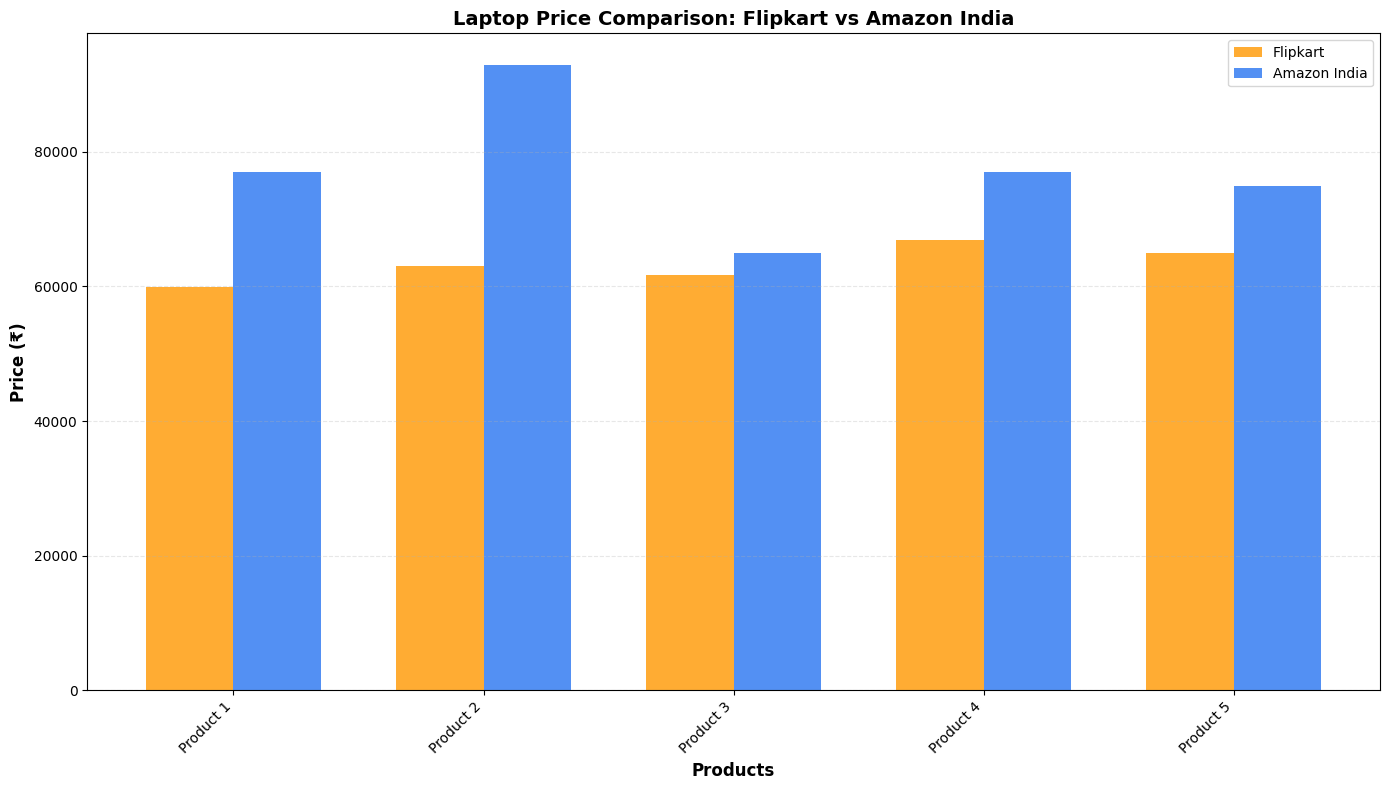


 PRICE ANALYSIS

 Flipkart:
   • Lowest Price: ₹59,990
   • Highest Price: ₹94,990
   • Average Price: ₹67,035
   • Total Products: 10

 Amazon India:
   • Lowest Price: ₹62,990
   • Highest Price: ₹128,999
   • Average Price: ₹79,674
   • Total Products: 10

 BEST OVERALL DEAL:
   • Platform: Flipkart
   • Price: ₹59,990
   • Product: Acer Nitro 5 AMD Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Win
   • Rating: 4.4
   • Link: https://www.flipkart.com/acer-nitro-5-amd-ryzen-hexa-core-r5-5600h-8-gb-512-gb-ssd-windows-11-home-4-graphics-nvidia-geforce-gtx-1650-an515-45-an515-45-r2m1-gaming-laptop/p/itm4c650ab22d983?pid=COMGEZZT4YJJ9JZM&lid=LSTCOMGEZZT4YJJ9JZMZ6JRUD&marketplace=FLIPKART&q=Acer+nitro+5&store=6bo%2Fb5g&srno=s_1_1&otracker=search&fm=organic&iid=843613bb-04a0-46f9-8c35-7abd725ed81f.COMGEZZT4YJJ9JZM.SEARCH&ppt=None&ppn=None&ssid=v6w5x390im0cho1s1770784716481&qH=c6d814722e9566d7


 PROJECT DELIVERABLES COMPLETED:
    Python script with Beautiful Soup & Selenium
    CSV o

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.options import Options
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import time
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import re

class LaptopPriceScraper:
    """
    A web scraper class for comparing laptop prices across e-commerce platforms.
    
    Attributes:
        firefox_options: Selenium Firefox browser configuration
        driver: Selenium WebDriver instance
        results: List storing scraped product data
    """
    
    def __init__(self):
        """Initialize the scraper with Firefox options and anti-detection settings"""
        self.firefox_options = Options()
        
        # Anti-detection configurations
        self.firefox_options.set_preference("dom.webdriver.enabled", False)
        self.firefox_options.set_preference('useAutomationExtension', False)
        self.firefox_options.set_preference("marionette.enabled", True)
        
        # User agent
        self.firefox_options.set_preference("general.useragent.override", 
            "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:122.0) Gecko/20100101 Firefox/122.0")
        
        # Privacy preferences
        self.firefox_options.set_preference("privacy.trackingprotection.enabled", False)
        self.firefox_options.set_preference("dom.webnotifications.enabled", False)
        self.firefox_options.set_preference("media.peerconnection.enabled", False)
        self.firefox_options.set_preference("geo.enabled", False)
        self.firefox_options.set_preference("javascript.enabled", True)
        
        self.driver = None
        self.results = []
    
    def start_driver(self):
        """Start the Firefox WebDriver with configured options"""
        try:
            self.driver = webdriver.Firefox(options=self.firefox_options)
            
            # Remove webdriver detection
            self.driver.execute_script("""
                Object.defineProperty(navigator, 'webdriver', {
                    get: () => undefined
                });
            """)
            
            print("Firefox browser started successfully")
            
        except Exception as e:
            print(f"Error starting Firefox: {str(e)}")
            print("\nInstallation steps for macOS:")
            print(" 1. Install GeckoDriver: brew install geckodriver")
            print(" 2. Remove quarantine: xattr -d com.apple.quarantine $(which geckodriver)")
            raise
    
    def scrape_flipkart(self, search_query):
        """
        Scrape Flipkart for laptop prices (Top 10 results)
        
        Args:
            search_query: Laptop model name (e.g., 'HP Pavilion')
            
        Returns:
            int: Number of products successfully scraped
        """
        print(f"\n Searching Flipkart for: {search_query}")
        
        try:
            # Navigate to Flipkart search
            flipkart_url = f"https://www.flipkart.com/search?q={search_query.replace(' ', '+')}"
            self.driver.get(flipkart_url)
            
            # Wait for page load
            time.sleep(4)
            
            # Handle login popup
            try:
                close_button = WebDriverWait(self.driver, 3).until(
                    EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), '✕')]"))
                )
                close_button.click()
                print(" Closed login popup")
                time.sleep(1)
            except:
                pass
            
            # Scroll to load dynamic content
            self.driver.execute_script("window.scrollTo(0, 800);")
            time.sleep(2)
            
            # Parse HTML
            soup = BeautifulSoup(self.driver.page_source, 'html.parser')
            
            # Find product containers (Flipkart structure as of Feb 2026)
            products = soup.find_all('div', {'class': 'jIjQ8S'})
            
            if not products:
                products = soup.find_all('a', {'class': 'k7wcnx'})
                products = [p.find_parent('div') for p in products if p.find_parent('div')]
            
            print(f" Found {len(products)} product containers")
            
            count = 0
            for product in products[:10]:  # TOP 10 RESULTS as per requirement
                try:
                    # Extract product name with error handling
                    name_elem = product.find('div', {'class': 'RG5Slk'})
                    name = name_elem.text.strip() if name_elem else None
                    
                    # Extract price with error handling
                    price_elem = product.find('div', {'class': 'hZ3P6w DeU9vF'})
                    if not price_elem:
                        price_elem = product.find('div', {'class': 'hZ3P6w'})
                    price = price_elem.text.strip() if price_elem else None
                    
                    # Extract rating with error handling
                    rating_elem = product.find('div', {'class': 'MKiFS6'})
                    rating = rating_elem.text.strip() if rating_elem else "No rating"
                    
                    # Extract link with error handling
                    link_elem = product.find('a', {'class': 'k7wcnx'})
                    if link_elem and link_elem.get('href'):
                        link = f"https://www.flipkart.com{link_elem['href']}"
                    else:
                        link = "N/A"
                    
                    # Validate required fields (name and price must exist)
                    if name and price and len(name) > 3:
                        self.results.append({
                            'Platform': 'Flipkart',
                            'Product Name': name,
                            'Price': price,
                            'Rating': rating,
                            'Link': link,
                            'Scraped At': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                        })
                        count += 1
                        print(f" [{count}] {name[:50]}... - {price}")
                    else:
                        # Error handling for missing fields
                        print(f" Skipped product: Missing required fields (name or price)")
                    
                except Exception as e:
                    # Error handling for parsing failures
                    print(f" Error parsing product: {str(e)}")
                    continue
            
            if count == 0:
                print("No products found. Website structure may have changed.")
            else:
                print(f" Successfully scraped {count} products from Flipkart")
            
            return count
            
        except Exception as e:
            print(f" Error scraping Flipkart: {str(e)}")
            return 0
    
    def scrape_amazon(self, search_query):
        """
        Scrape Amazon India for laptop prices (Top 10 results)
        
        Args:
            search_query: Laptop model name (e.g., 'HP Pavilion')
            
        Returns:
            int: Number of products successfully scraped
        """
        print(f"\n Searching Amazon India for: {search_query}")
        
        try:
            # Navigate to Amazon India search
            amazon_url = f"https://www.amazon.in/s?k={search_query.replace(' ', '+')}"
            self.driver.get(amazon_url)
            
            # Wait for page load
            time.sleep(3)
            
            # Check for CAPTCHA
            if "Sorry, we just need to make sure you're not a robot" in self.driver.page_source:
                print(" CAPTCHA detected. Please solve it manually in the browser.")
                input("Press Enter after solving CAPTCHA...")
            
            # Parse HTML
            soup = BeautifulSoup(self.driver.page_source, 'html.parser')
            
            # Find product cards
            products = soup.find_all('div', {'data-component-type': 's-search-result'})
            
            print(f"  Found {len(products)} product containers")
            
            count = 0
            for product in products[:10]:  # TOP 10 RESULTS as per requirement
                try:
                    # Extract product name with error handling
                    name_elem = product.find('span', {'class': 'a-size-medium a-color-base a-text-normal'})
                    if not name_elem:
                        name_elem = product.find('h2')
                    name = name_elem.text.strip() if name_elem else None
                    
                    # Extract price with error handling
                    price_elem = product.find('span', {'class': 'a-price-whole'})
                    price = f"₹{price_elem.text.strip()}" if price_elem else None
                    
                    # Extract rating with error handling
                    rating_elem = product.find('span', {'class': 'a-icon-alt'})
                    rating = rating_elem.text.strip() if rating_elem else "No rating"
                    
                    # Extract link with error handling
                    link_elem = product.find('a', {'class': 'a-link-normal s-no-outline'})
                    if not link_elem:
                        h2 = product.find('h2')
                        link_elem = h2.find('a') if h2 else None
                    link = f"https://www.amazon.in{link_elem['href']}" if link_elem and link_elem.get('href') else "N/A"
                    
                    # Validate required fields
                    if name and price:
                        self.results.append({
                            'Platform': 'Amazon India',
                            'Product Name': name,
                            'Price': price,
                            'Rating': rating,
                            'Link': link,
                            'Scraped At': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                        })
                        count += 1
                        print(f"   [{count}] {name[:50]}... - {price}")
                    else:
                        # Error handling for missing fields
                        print(f"  Skipped product: Missing required fields (name or price)")
                
                except Exception as e:
                    # Error handling for parsing failures
                    print(f"  Error parsing product: {str(e)}")
                    continue
            
            if count == 0:
                print(" No products found. Website structure may have changed.")
            else:
                print(f" Successfully scraped {count} products from Amazon India")
            
            return count
            
        except Exception as e:
            print(f" Error scraping Amazon: {str(e)}")
            return 0
    
    def extract_numeric_price(self, price_str):
        """
        Extract numeric price from price string
        
        Args:
            price_str: Price string like "₹62,499" or "62499"
            
        Returns:
            float: Numeric price value, or None if extraction fails
        """
        try:
            # Remove currency symbols and commas
            numeric_str = re.sub(r'[₹,\s]', '', price_str)
            return float(numeric_str)
        except:
            return None
    
    def generate_price_chart(self, df):
        """
        Generate bar chart comparing prices across platforms
        
        Args:
            df: Pandas DataFrame with scraped data
        """
        try:
            print("\n Generating price comparison chart...")
            
            # Extract numeric prices
            df['Numeric Price'] = df['Price'].apply(self.extract_numeric_price)
            df_valid = df.dropna(subset=['Numeric Price'])
            
            if df_valid.empty:
                print(" No valid prices to chart")
                return
            
            # Get top 5 products from each platform for cleaner visualization
            flipkart_data = df_valid[df_valid['Platform'] == 'Flipkart'].head(5)
            amazon_data = df_valid[df_valid['Platform'] == 'Amazon India'].head(5)
            
            # Create figure
            plt.figure(figsize=(14, 8))
            
            # Plot data
            x_labels = []
            flipkart_prices = []
            amazon_prices = []
            
            max_items = max(len(flipkart_data), len(amazon_data))
            
            for i in range(max_items):
                x_labels.append(f"Product {i+1}")
                
                if i < len(flipkart_data):
                    flipkart_prices.append(flipkart_data.iloc[i]['Numeric Price'])
                else:
                    flipkart_prices.append(0)
                
                if i < len(amazon_data):
                    amazon_prices.append(amazon_data.iloc[i]['Numeric Price'])
                else:
                    amazon_prices.append(0)
            
            x = range(len(x_labels))
            width = 0.35
            
            plt.bar([i - width/2 for i in x], flipkart_prices, width, label='Flipkart', color='#ff9800', alpha=0.8)
            plt.bar([i + width/2 for i in x], amazon_prices, width, label='Amazon India', color='#2874f0', alpha=0.8)
            
            # Customize chart
            plt.xlabel('Products', fontsize=12, fontweight='bold')
            plt.ylabel('Price (₹)', fontsize=12, fontweight='bold')
            plt.title('Laptop Price Comparison: Flipkart vs Amazon India', fontsize=14, fontweight='bold')
            plt.xticks(x, x_labels, rotation=45, ha='right')
            plt.legend(loc='upper right', fontsize=10)
            plt.grid(axis='y', alpha=0.3, linestyle='--')
            plt.tight_layout()
            
            # Save chart
            chart_filename = f"price_comparison_chart_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
            plt.savefig(chart_filename, dpi=300, bbox_inches='tight')
            print(f" Chart saved as: {chart_filename}")
            
            # Show chart
            plt.show()
            
        except Exception as e:
            print(f" Error generating chart: {str(e)}")
    
    def compare_prices(self):
        """
        Display comparison results, export CSV, and generate visualizations
        """
        if not self.results:
            print("\n No results found to compare.")
            return
        
        print("\n" + "="*100)
        print(" PRICE COMPARISON RESULTS")
        print("="*100)
        
        # Convert to DataFrame
        df = pd.DataFrame(self.results)
        
        # Display results table
        print("\n" + df.to_string(index=False))
        
        # Export to CSV
        csv_filename = f"laptop_price_comparison_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        df.to_csv(csv_filename, index=False)
        print(f"\n CSV Report saved: {csv_filename}")
        
        # Generate price comparison chart
        self.generate_price_chart(df)
        
        # Price analysis
        print("\n" + "="*100)
        print(" PRICE ANALYSIS")
        print("="*100)
        
        # Add numeric prices for comparison
        df['Numeric Price'] = df['Price'].apply(self.extract_numeric_price)
        df_with_prices = df.dropna(subset=['Numeric Price'])
        
        if not df_with_prices.empty:
            # Platform-wise analysis
            for platform in df['Platform'].unique():
                platform_data = df_with_prices[df_with_prices['Platform'] == platform]
                if not platform_data.empty:
                    min_price = platform_data['Numeric Price'].min()
                    max_price = platform_data['Numeric Price'].max()
                    avg_price = platform_data['Numeric Price'].mean()
                    
                    print(f"\n {platform}:")
                    print(f"   • Lowest Price: ₹{min_price:,.0f}")
                    print(f"   • Highest Price: ₹{max_price:,.0f}")
                    print(f"   • Average Price: ₹{avg_price:,.0f}")
                    print(f"   • Total Products: {len(platform_data)}")
            
            # Overall best deal
            best_deal = df_with_prices.loc[df_with_prices['Numeric Price'].idxmin()]
            print(f"\n BEST OVERALL DEAL:")
            print(f"   • Platform: {best_deal['Platform']}")
            print(f"   • Price: {best_deal['Price']}")
            print(f"   • Product: {best_deal['Product Name'][:70]}")
            print(f"   • Rating: {best_deal['Rating']}")
            print(f"   • Link: {best_deal['Link']}")
        
        print("\n" + "="*100)
    
    def close(self):
        """Close the browser and cleanup"""
        if self.driver:
            self.driver.quit()
            print("\n Browser closed successfully")


def main():
    """
    Main execution function
    
    This function orchestrates the entire scraping workflow:
    1. Initialize scraper
    2. Get user input
    3. Scrape both platforms
    4. Generate comparison reports and charts
    """
    print("="*100)
    print(" LAPTOP PRICE COMPARISON TOOL")
    print("   Project: Price Comparison Tool - NewtonAI Technologies")
    print("   Platforms: Flipkart & Amazon India")
    print("="*100)
    
    # Get user input
    laptop_model = input("\nEnter laptop model to search (e.g., 'HP Pavilion', 'Acer Nitro 5'): ").strip()
    
    if not laptop_model:
        print(" Please provide a valid laptop model name.")
        return
    
    # Initialize scraper
    scraper = LaptopPriceScraper()
    
    try:
        # Start browser
        print("\n Starting Firefox browser...")
        scraper.start_driver()
        
        # Scrape both platforms (top 10 from each)
        flipkart_count = scraper.scrape_flipkart(laptop_model)
        time.sleep(2)  # Respectful delay between requests
        
        amazon_count = scraper.scrape_amazon(laptop_model)
        
        # Summary
        print("\n" + "="*100)
        print(" SCRAPING SUMMARY")
        print("="*100)
        print(f"   • Flipkart: {flipkart_count} products scraped")
        print(f"   • Amazon India: {amazon_count} products scraped")
        print(f"   • Total: {flipkart_count + amazon_count} products")
        
        # Generate comparison report and visualizations
        scraper.compare_prices()
        
        print("\n" + "="*100)
        print(" PROJECT DELIVERABLES COMPLETED:")
        print("    Python script with Beautiful Soup & Selenium")
        print("    CSV output file generated")
        print("    Price comparison bar chart created")
        print("    Error handling for missing fields implemented")
        print("    Scraped <50 items per site (respecting usage policy)")
        print("="*100)
        
    except Exception as e:
        print(f"\n Error: {str(e)}")
    
    finally:
        # Cleanup
        scraper.close()


if __name__ == "__main__":
    main()
